In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("/Users/max/MasterThesis/Training/"))

In [2]:
import torch
from torch.utils.data import DataLoader, Subset, ConcatDataset, TensorDataset
from torchvision import datasets, transforms
import numpy as np

# 数据预处理
mnist17_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载 MNIST 数据集
full_train_datasets = datasets.MNIST(root="/Users/max/MasterThesisData/MNIST", train=True, transform=mnist17_transforms, download=True)
full_test_datasets = datasets.MNIST(root="/Users/max/MasterThesisData/MNIST", train=False, transform=mnist17_transforms, download=True)

# 选取标签为 1 和 7 的索引
indices1_train = [i for i in range(len(full_train_datasets)) if full_train_datasets.targets[i] == 1]
indices7_train = [i for i in range(len(full_train_datasets)) if full_train_datasets.targets[i] == 7]

indices1_test = [i for i in range(len(full_test_datasets)) if full_test_datasets.targets[i] == 1]
indices7_test = [i for i in range(len(full_test_datasets)) if full_test_datasets.targets[i] == 7]

# 获取训练集中标签为 1 和 7 的数据
mnist1_train_data = full_train_datasets.data[indices1_train]
mnist1_train_labels = torch.ones(len(indices1_train), dtype=torch.long)  # 标签 1 保持不变

mnist7_train_data = full_train_datasets.data[indices7_train]
mnist7_train_labels = torch.zeros(len(indices7_train), dtype=torch.long)  # 标签 7 映射为 0

# 获取测试集中标签为 1 和 7 的数据
mnist1_test_data = full_test_datasets.data[indices1_test]
mnist1_test_labels = torch.ones(len(indices1_test), dtype=torch.long)  # 标签 1 保持不变

mnist7_test_data = full_test_datasets.data[indices7_test]
mnist7_test_labels = torch.zeros(len(indices7_test), dtype=torch.long)  # 标签 7 映射为 0

# we can set the imbalanced ratio 0.005, 0.01, 0.02, 0.05, 0.1, 0.2
fraction = int(0.005 * len(mnist1_train_data))  ### control the fraction of the data to be used
selected_indices_7 = np.random.choice(len(mnist7_train_data), fraction, replace=False)

fraction_mnist7_train_data = mnist7_train_data[selected_indices_7]
fraction_mnist7_train_labels = mnist7_train_labels[selected_indices_7]

# 创建最终的训练和测试数据集
Final_train_data = torch.cat([mnist1_train_data, fraction_mnist7_train_data], dim=0)
Final_train_labels = torch.cat([mnist1_train_labels, fraction_mnist7_train_labels], dim=0)

Final_test_data = torch.cat([mnist1_test_data, mnist7_test_data], dim=0)
Final_test_labels = torch.cat([mnist1_test_labels, mnist7_test_labels], dim=0)

# 创建 TensorDataset
Final_train_datasets = TensorDataset(Final_train_data.unsqueeze(1).float() / 255, Final_train_labels)
Final_test_datasets = TensorDataset(Final_test_data.unsqueeze(1).float() / 255, Final_test_labels)

# 数据加载器
train_loader = DataLoader(Final_train_datasets, batch_size=64, shuffle=True)
test_loader = DataLoader(Final_test_datasets, batch_size=64, shuffle=False)

# 打印信息
print("Number of label 1 in the final training set: ", len(mnist1_train_data))
print("Number of label 7 in the final training set (after downsampling): ", len(fraction_mnist7_train_data))
print("Number of label 1 in the final test set: ", len(mnist1_test_data))
print("Number of label 7 in the final test set: ", len(mnist7_test_data))

print("Total samples in final training set: ", len(Final_train_datasets))
print("Total samples in final test set: ", len(Final_test_datasets))

print("Number of batches in training set: ", len(train_loader))
print("Number of batches in test set: ", len(test_loader))


Number of label 1 in the final training set:  6742
Number of label 7 in the final training set (after downsampling):  33
Number of label 1 in the final test set:  1135
Number of label 7 in the final test set:  1028
Total samples in final training set:  6775
Total samples in final test set:  2163
Number of batches in training set:  106
Number of batches in test set:  34


Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
First image tensor:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.00

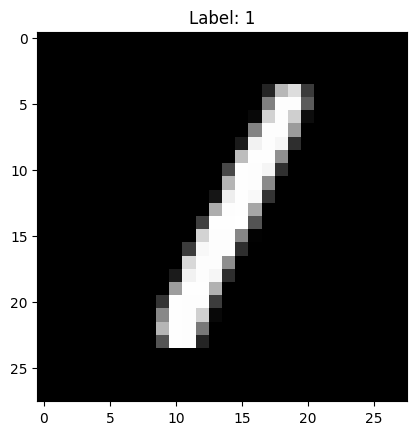

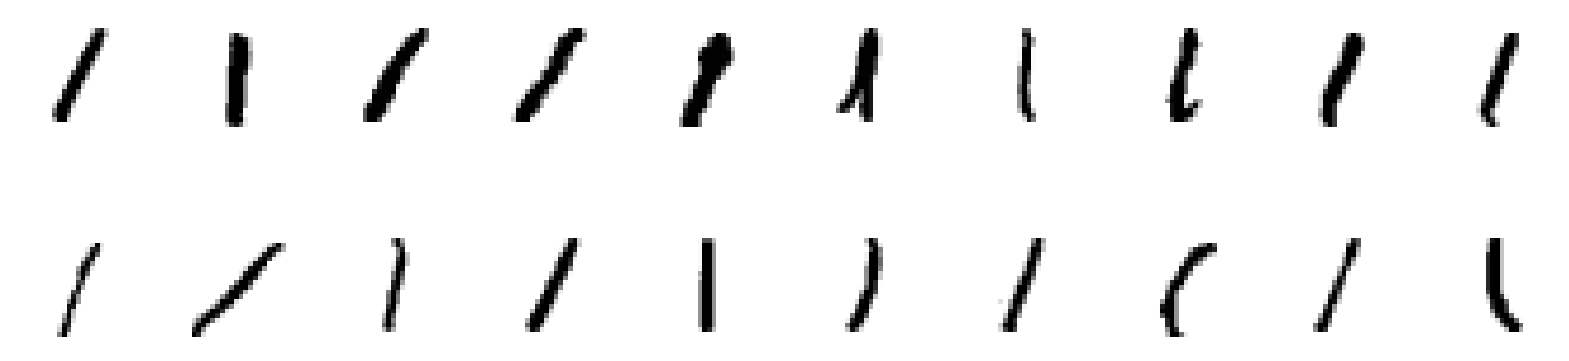

In [3]:
# 获取一个 batch
images, labels = next(iter(train_loader))

# 查看 Tensor 形状
print(f"Images shape: {images.shape}")  # 形状为 (batch_size, channels, height, width)
print(f"Labels shape: {labels.shape}")  # 形状为 (batch_size,)

# 查看第一个样本的 Tensor 值
print(f"First image tensor:\n{images[0]}")  # 打印第一个样本的 Tensor 数据
print(f"First image label: {labels[0]}")  # 打印第一个样本的标签

# 如果需要转换回 NumPy 并可视化：
import matplotlib.pyplot as plt

# 转换为 NumPy 并显示
plt.imshow(images[0].squeeze().numpy(), cmap="gray")
plt.title(f"Label: {labels[0].item()}")
plt.show()


import numpy as np

 # 指定图片大小，图像大小为20宽、5高的绘图(单位为英寸inch)
plt.figure(figsize=(20, 5)) 
for i, imgs in enumerate(images[:20]):
    # 维度缩减
    npimg = np.squeeze(imgs.numpy())
    # 将整个figure分成2行10列，绘制第i+1个子图。
    plt.subplot(2, 10, i+1)
    plt.imshow(npimg, cmap=plt.cm.binary)
    plt.axis('off')

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
X_train = [] # features
y_train = [] # labels

for batch in train_loader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in test_loader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
# labels = np.unique(y_train)
# print("Labels:", labels)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 0)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 0)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.svm import SVC

# 定义每个类别的权重。例如，这里对类别 0 的误分类惩罚更高
## 0.005: {1: 1, 0: 200}
## 0.01: {1: 1, 0: 100}
## 0.02: {1: 1, 0: 50}
## 0.05: {1: 1, 0: 20}
## 0.1: {1: 1, 0: 10}
## 0.2: {1: 1, 0: 5}
class_weights = {1: 1, 0: 200}

clf = SVC(kernel='linear', C=1.0, class_weight=class_weights)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)

from self_metrics import Binary17_got_confusion_matrix
from self_metrics import Binary_got_cofusion_matrix
from self_metrics import Binary_got_metrics
TP, FP, FN, TN = Binary_got_cofusion_matrix(y_test, y_pred,[1,0])
Accuracy, misclassification_rate, Sensitivity, Specificity, Precision, Negative_Predictive_Value, Gmean, Fmean, DPower, F2measure, InvF_05, AGFmeasure, Balanced_Accuracy, MCCmeasure, Kappa, Youden_Index, LR_pos, LR_neg = Binary_got_metrics(TP, FP, FN, TN)
import json

        # 构造一个包含所有指标数据的字典
metrics_dict = {
            "Number of label 1 in the final training set": len(mnist1_train_data),
            "Number of label 7 in the final training set (after downsampling)": len(fraction_mnist7_train_data),
            "Number of label 1 in the final test set": len(mnist1_test_data),
            "Number of label 7 in the final test set": len(mnist7_test_data),
            "Total samples in final training set": len(Final_train_datasets),
            "Total samples in final test set": len(Final_test_datasets),
            "Number of batches in training set": len(train_loader),
            "Number of batches in test set": len(test_loader),
            "TP": TP,
            "FP": FP,
            "FN": FN,
            "TN": TN,
            "Accuracy": round(Accuracy, 4),
            "Misclassification rate": round(misclassification_rate, 4),
            "Sensitivity (Recall)": round(Sensitivity, 4),
            "Specificity": round(Specificity, 4),
            "Precision": round(Precision, 4),
            "Negative Predictive Value": round(Negative_Predictive_Value, 4),
            "G-mean": round(Gmean, 4),
            "F-measure": round(Fmean, 4),
            "Discriminant Power (DP)": round(DPower, 4),
            "F2-measure": round(F2measure, 4),
            "InvF0.5-measure": round(InvF_05, 4),
            "AGF": round(AGFmeasure, 4),
            "Balanced Accuracy": round(Balanced_Accuracy, 4),
            "Matthew's Correlation Coefficient (MCC)": round(MCCmeasure, 4),
            "Cohen's Kappa": round(Kappa, 4),
            "Youden's Index": round(Youden_Index, 4),
            "Positive Likelihood Ratio (LR+)": round(LR_pos, 4),
            "Negative Likelihood Ratio (LR-)": round(LR_neg, 4)
        }

        # 指定 JSON 文件保存路径
metrics_results_path = f"CSVMBinaryMNIST17_{fraction}_metrics_results.json"

# 将字典保存为 JSON 文件
with open(metrics_results_path, "w") as f:
    json.dump(metrics_dict, f, indent=4)


1 is negative, 7 is positive
Train_label1: 6742
Train_label7: 33
Test_label1: 1135
Test_label7: 1028
X_train.shape: (6775, 784)
y_train.shape: (6775,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1135
FP: 183
FN: 0
TN: 845
Accuracy: 0.9154
Misclassification rate: 0.0846
Sensitivity (Recall): 1.0000
Specificity: 0.8220
Precision: 0.8612
Negative Predictive Value: 1.0000
G-mean: 0.9066
F-measure: 0.9254
Discriminant Power: Infinity
F2-measure: 0.8857
InvF0.5-measure: 0.9688
AGF: 0.9263
Balanced Accuracy: 0.9110
Matthew's Correlation Coefficient: 0.8413
Cohen's Kappa: 0.8289
Youden's Index: 0.8220
Positive Likelihood Ratio: 5.6175
Negative Likelihood Ratio: 0.0000
